In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 
import numpy as np
import requests
import json
import csv

# Reading in the CSV files

In [2]:
airlines_df = pd.read_csv("Airline reviews 3.csv")
airlines_df

,header,author,date,place,content,aircraft,traveller_type,seat_type,route,date_flown,recommended,trip_verified,rating,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,entertainment
0,service was mediocre at best,Gary Storer,3/10/2023,United Kingdom,"Just returned from Chicago, flew out 10 days ...",A380,Couple Leisure,Economy Class,Chicago to Manchester via Heathrow,1/10/2023,no,Not Verified,2,2,3,1,2,2,-1
1,BA standards continue to decline,A Jensen,2/10/2023,United Kingdom,BA standards continue to decline every time ...,A320,Business,Business Class,London Heathrow to Munich,1/9/2023,no,Verified,2,2,1,2,1,1,-1
2,"won the race to the bottom""",John Rockett,2/10/2023,United Kingdom,Awful. Business class check in queue just as...,A320,Couple Leisure,Business Class,Heathrow to Istanbul,1/9/2023,no,Not Verified,2,2,3,2,1,1,-1
3,Not a reliable airline,Tatiana Bobrovskaya,2/10/2023,United Kingdom,Not a reliable airline. You cannot trust the...,A320,Business,Economy Class,London to Geneva,1/10/2023,no,Verified,3,4,4,2,1,1,-1
4,Very disappointed,Tom Slowbe,28-09-2023,United States,"The airplanes and the lounges are worn out, o...",777-300 and A320,Couple Leisure,First Class,Dallas to Dubrovnik via Heathrow,1/9/2023,no,Verified,1,1,4,4,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,seat let down very good flight,Gregory Martinez,26-03-2016,United Kingdom,Barcelona to Seoul Incheon via London Heathr...,Boeing 787,Solo Leisure,Economy Class,BCN to SEL via LHR,1/3/2016,yes,Verified,8,3,4,4,4,5,4
1320,friendly and efficient service,Philip Djaferis,25-03-2016,Switzerland,London Heathrow to Houston on British Airway...,Boeing 777-200,Couple Leisure,Economy Class,LHR to IAH,1/3/2016,yes,Verified,8,3,5,4,4,4,4
1321,BA.com been truly appalling,Joanne Le Bon,24-03-2016,United Kingdom,We have flown with British Airways over 100 ...,Boeing 747-400,Couple Leisure,First Class,LHR to DEN,1/3/2016,no,Verified,8,3,4,3,4,2,3
1322,overall experience was pleasant,J Lawrence,23-03-2016,South Africa,British Airways from Seattle to Johannesburg...,Boeing 747-400 /A380,Solo Leisure,Economy Class,SEA to JNB via LHR,1/3/2016,yes,Verified,8,3,4,4,4,4,2


In [3]:
airlines_reviews_df = pd.read_csv("Airlines Reviews and Ratings.csv")
airlines_reviews_df

,Aircraft Type,Users Reviews,Country,Type_of_Travellers,Route,Seat_Types,Seat Comfort,Date Flown,Cabin Staff Service,Ground Service,Food & Beverages,Wifi & Connectivity,Inflight Entertainment,Value For Money,Recommended
0,NaN,✅Trip Verified| Cancelled our flight last-min...,United Kingdom,Couple Leisure,London Heathrow to Tokyo,Economy Class,1.0,23-Sep,1.0,2.0,1.0,NaN,3.0,1,no
1,NaN,"✅Trip Verified| I had a flight from Miami, Flo...",United States,Solo Leisure,Miami to Dublin via London Heathrow,Business Class,1.0,23-Aug,3.0,1.0,2.0,1.0,1.0,1,no
2,NaN,✅Trip Verified| We started our day with BA in...,United States,Business,Prague to San Francisco via London,Business Class,1.0,23-Sep,3.0,1.0,3.0,1.0,NaN,1,no
3,NaN,✅Trip Verified| I fly British Airways weekly ...,United Kingdom,Business,London to Glasgow,Economy Class,1.0,23-Sep,1.0,1.0,1.0,1.0,1.0,1,no
4,NaN,Not Verified| Everything was ok until our con...,France,Family Leisure,San Diego to Marseille via London,Economy Class,3.0,23-Aug,2.0,1.0,3.0,1.0,3.0,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,NaN,LAX to LHR - 25 Oct 2014. I agree with other r...,United Kingdom,NaN,NaN,Business Class,3.0,NaN,2.0,NaN,1.0,NaN,3.0,2,no
3286,NaN,Toronto to London Heathrow - 26/10/14. After r...,United Kingdom,NaN,NaN,Business Class,4.0,NaN,5.0,NaN,5.0,NaN,5.0,4,yes
3287,NaN,I have after years of loyalty finally had it w...,United Kingdom,NaN,NaN,Business Class,3.0,NaN,1.0,NaN,1.0,NaN,2.0,1,no
3288,NaN,Traveled with British Airways ORD-LHR last mon...,United States,NaN,NaN,Business Class,5.0,NaN,5.0,NaN,4.0,NaN,4.0,4,yes


# Dropping Columns We Don't Need

In [4]:
airlines_df = airlines_df.drop(["date", "content", "route", "author", "date_flown", "header"], axis=1)
airlines_df

,place,aircraft,traveller_type,seat_type,recommended,trip_verified,rating,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,entertainment
0,United Kingdom,A380,Couple Leisure,Economy Class,no,Not Verified,2,2,3,1,2,2,-1
1,United Kingdom,A320,Business,Business Class,no,Verified,2,2,1,2,1,1,-1
2,United Kingdom,A320,Couple Leisure,Business Class,no,Not Verified,2,2,3,2,1,1,-1
3,United Kingdom,A320,Business,Economy Class,no,Verified,3,4,4,2,1,1,-1
4,United States,777-300 and A320,Couple Leisure,First Class,no,Verified,1,1,4,4,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,United Kingdom,Boeing 787,Solo Leisure,Economy Class,yes,Verified,8,3,4,4,4,5,4
1320,Switzerland,Boeing 777-200,Couple Leisure,Economy Class,yes,Verified,8,3,5,4,4,4,4
1321,United Kingdom,Boeing 747-400,Couple Leisure,First Class,no,Verified,8,3,4,3,4,2,3
1322,South Africa,Boeing 747-400 /A380,Solo Leisure,Economy Class,yes,Verified,8,3,4,4,4,4,2


In [5]:
airlines_reviews_df = airlines_reviews_df.drop(["Route", "Users Reviews", "Date Flown"], axis=1)
airlines_reviews_df

,Aircraft Type,Country,Type_of_Travellers,Seat_Types,Seat Comfort,Cabin Staff Service,Ground Service,Food & Beverages,Wifi & Connectivity,Inflight Entertainment,Value For Money,Recommended
0,NaN,United Kingdom,Couple Leisure,Economy Class,1.0,1.0,2.0,1.0,NaN,3.0,1,no
1,NaN,United States,Solo Leisure,Business Class,1.0,3.0,1.0,2.0,1.0,1.0,1,no
2,NaN,United States,Business,Business Class,1.0,3.0,1.0,3.0,1.0,NaN,1,no
3,NaN,United Kingdom,Business,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1,no
4,NaN,France,Family Leisure,Economy Class,3.0,2.0,1.0,3.0,1.0,3.0,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...
3285,NaN,United Kingdom,NaN,Business Class,3.0,2.0,NaN,1.0,NaN,3.0,2,no
3286,NaN,United Kingdom,NaN,Business Class,4.0,5.0,NaN,5.0,NaN,5.0,4,yes
3287,NaN,United Kingdom,NaN,Business Class,3.0,1.0,NaN,1.0,NaN,2.0,1,no
3288,NaN,United States,NaN,Business Class,5.0,5.0,NaN,4.0,NaN,4.0,4,yes


# Finding and Removing null values 

In [6]:
#Finding null values in airlines_df
null_values_airlines = airlines_df.isnull().sum()
print("Number of null values: ")
print(null_values_airlines)

Number of null values: 
place                  0
aircraft               0
traveller_type         1
seat_type              0
recommended            0
trip_verified          0
rating                 0
seat_comfort           0
cabin_staff_service    0
food_beverages         0
ground_service         0
value_for_money        0
entertainment          0
dtype: int64


In [7]:
#reprinting to see if null values have been removed
airlines_df.dropna(inplace=True)
null_values_airlines = airlines_df.isnull().sum()
print("Number of null values: ")
print(null_values_airlines)

Number of null values: 
place                  0
aircraft               0
traveller_type         0
seat_type              0
recommended            0
trip_verified          0
rating                 0
seat_comfort           0
cabin_staff_service    0
food_beverages         0
ground_service         0
value_for_money        0
entertainment          0
dtype: int64


In [8]:
#Finding null values in airlines_reviews_df
null_values_reviews = airlines_reviews_df.isnull().sum()
print("Number of null values: ")
print(null_values_reviews)

Number of null values: 
Aircraft Type             1394
Country                      1
Type_of_Travellers         403
Seat_Types                   3
Seat Comfort               114
Cabin Staff Service        125
Ground Service             478
Food & Beverages           379
Wifi & Connectivity       2698
Inflight Entertainment    1119
Value For Money              0
Recommended                  0
dtype: int64


In [39]:
airlines_reviews_df.fillna(0, inplace=True)
airlines_reviews_df

,Aircraft Type,Country,Type_of_Travellers,Seat_Types,Seat Comfort,Cabin Staff Service,Ground Service,Food & Beverages,Wifi & Connectivity,Inflight Entertainment,Value For Money,Recommended
14,A320,Germany,Couple Leisure,Economy Class,1.0,3.0,1.0,1.0,1.0,1.0,1,no
17,Boeing 777-200,Iceland,Couple Leisure,Business Class,4.0,3.0,4.0,3.0,3.0,3.0,4,yes
23,A320,United Kingdom,Solo Leisure,Business Class,1.0,1.0,1.0,1.0,1.0,1.0,1,no
34,A380,United Kingdom,Family Leisure,Business Class,4.0,5.0,4.0,5.0,5.0,5.0,4,yes
39,A380 / A320,Poland,Business,Economy Class,3.0,5.0,1.0,4.0,3.0,5.0,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...
2830,Boeing 747-400,United States,Couple Leisure,Premium Economy,4.0,5.0,3.0,4.0,4.0,5.0,4,yes
2838,A318,United Kingdom,Solo Leisure,Business Class,5.0,5.0,5.0,5.0,5.0,5.0,3,yes
2840,Boeing 777,United Kingdom,Family Leisure,Economy Class,1.0,2.0,1.0,1.0,1.0,1.0,2,no
2848,A380,United Kingdom,Solo Leisure,Economy Class,4.0,5.0,4.0,3.0,4.0,5.0,5,yes


In [40]:
#reprinting to see if null values have been removed
airlines_reviews_df.dropna(inplace=True)
null_values_reviews = airlines_reviews_df.isnull().sum()
print("Number of null values: ")
print(null_values_reviews)

Number of null values: 
Aircraft Type             0
Country                   0
Type_of_Travellers        0
Seat_Types                0
Seat Comfort              0
Cabin Staff Service       0
Ground Service            0
Food & Beverages          0
Wifi & Connectivity       0
Inflight Entertainment    0
Value For Money           0
Recommended               0
dtype: int64


# Renaming the columns 

In [41]:
airlines_df.rename(columns={'aircraft': 'Aircraft Type', 'recommended': 'Recommended', 
                            'traveller_type': 'Type_of_Travellers', 'seat_type': 'Seat_Types',
                           'seat_comfort': 'Seat Comfort', 'food_beverages': 'Food & Beverages',
                           'place': 'Country', 'cabin_staff_service': 'Cabin Staff Service',
                           'ground_service': 'Ground Service', 'value_for_money': 'Value For Money',
                           'entertainment': 'Inflight Entertainment'}, inplace=True)
airlines_df

,Country,Aircraft Type,Type_of_Travellers,Seat_Types,Recommended,trip_verified,rating,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Inflight Entertainment
0,United Kingdom,A380,Couple Leisure,Economy Class,no,Not Verified,2,2,3,1,2,2,-1
1,United Kingdom,A320,Business,Business Class,no,Verified,2,2,1,2,1,1,-1
2,United Kingdom,A320,Couple Leisure,Business Class,no,Not Verified,2,2,3,2,1,1,-1
3,United Kingdom,A320,Business,Economy Class,no,Verified,3,4,4,2,1,1,-1
4,United States,777-300 and A320,Couple Leisure,First Class,no,Verified,1,1,4,4,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,United Kingdom,Boeing 787,Solo Leisure,Economy Class,yes,Verified,8,3,4,4,4,5,4
1320,Switzerland,Boeing 777-200,Couple Leisure,Economy Class,yes,Verified,8,3,5,4,4,4,4
1321,United Kingdom,Boeing 747-400,Couple Leisure,First Class,no,Verified,8,3,4,3,4,2,3
1322,South Africa,Boeing 747-400 /A380,Solo Leisure,Economy Class,yes,Verified,8,3,4,4,4,4,2


In [42]:
airlines_reviews_df

,Aircraft Type,Country,Type_of_Travellers,Seat_Types,Seat Comfort,Cabin Staff Service,Ground Service,Food & Beverages,Wifi & Connectivity,Inflight Entertainment,Value For Money,Recommended
14,A320,Germany,Couple Leisure,Economy Class,1.0,3.0,1.0,1.0,1.0,1.0,1,no
17,Boeing 777-200,Iceland,Couple Leisure,Business Class,4.0,3.0,4.0,3.0,3.0,3.0,4,yes
23,A320,United Kingdom,Solo Leisure,Business Class,1.0,1.0,1.0,1.0,1.0,1.0,1,no
34,A380,United Kingdom,Family Leisure,Business Class,4.0,5.0,4.0,5.0,5.0,5.0,4,yes
39,A380 / A320,Poland,Business,Economy Class,3.0,5.0,1.0,4.0,3.0,5.0,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...
2830,Boeing 747-400,United States,Couple Leisure,Premium Economy,4.0,5.0,3.0,4.0,4.0,5.0,4,yes
2838,A318,United Kingdom,Solo Leisure,Business Class,5.0,5.0,5.0,5.0,5.0,5.0,3,yes
2840,Boeing 777,United Kingdom,Family Leisure,Economy Class,1.0,2.0,1.0,1.0,1.0,1.0,2,no
2848,A380,United Kingdom,Solo Leisure,Economy Class,4.0,5.0,4.0,3.0,4.0,5.0,5,yes


# Merging the files 

In [43]:
airlines_merged_df = pd.merge(airlines_df, airlines_reviews_df, on=['Aircraft Type', 'Recommended','Type_of_Travellers', 
                                                                    'Seat_Types', 'Seat Comfort', 'Food & Beverages', 
                                                                    'Country', 'Cabin Staff Service','Ground Service',
                                                                    'Value For Money','Inflight Entertainment']) 
airlines_merged_df

,Country,Aircraft Type,Type_of_Travellers,Seat_Types,Recommended,trip_verified,rating,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Inflight Entertainment,Wifi & Connectivity
0,Germany,A320,Couple Leisure,Economy Class,no,Verified,1,1,3,1,1,1,1,1.0
1,Iceland,Boeing 777-200,Couple Leisure,Business Class,yes,Verified,1,4,3,3,4,4,3,3.0
2,United Kingdom,A320,Solo Leisure,Business Class,no,Verified,6,1,1,1,1,1,1,1.0
3,United Kingdom,A320,Solo Leisure,Business Class,no,Verified,6,1,1,1,1,1,1,1.0
4,United Kingdom,A320,Solo Leisure,Business Class,no,Verified,6,1,1,1,1,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,United States,A380,Business,Business Class,no,Verified,8,4,3,3,4,2,4,3.0
263,United Kingdom,Boeing 787,Solo Leisure,Economy Class,no,Verified,9,1,1,1,3,2,2,2.0
264,Belgium,A380,Business,Economy Class,no,Verified,1,1,2,1,3,2,3,1.0
265,United Kingdom,Boeing 777,Business,Economy Class,no,Verified,3,3,2,2,2,2,2,2.0


# What are the unique aircrafts and the total count

In [44]:
# Clean up 'Aircraft Type' column by removing special characters and whitespace, and converting to lowercase
unique_aircrafts = airlines_merged_df["Aircraft Type"].unique()
airlines_merged_df['Aircraft Type'] = airlines_merged_df['Aircraft Type'].str.replace('[^\w\s]', '').str.strip().str.replace('\xa0', ' ').str.lower()
aircraft = airlines_merged_df.groupby('Aircraft Type').size()
print(unique_aircrafts)
print(f"And there are {len(unique_aircrafts)} unique aircraft types")

['A320' 'Boeing 777-200' 'A380' 'A380 / A320' 'A320Neo' 'A321Neo' 'A350'
 'Boeing 777' 'Boeing 777-300' 'A320 Finnair' 'Boeing 787-9' 'Boeing 787'
 'Dreamliner' 'Boeing 777-300ER' 'Boeing 787-8' 'A320, A380' 'A350-1000'
 'Boeing 787-10' 'A320, Boeing 787' 'Boeing 777-200ER' 'A321' 'A321NEO'
 'Boeing 747' 'A320neo' 'Boeing 747-400' 'A321neo' 'Boeing 787-900'
 'Boeing 737' 'A319 / Boeing 789' 'A321 / Boeing 787-9' 'Boeing 747 400'
 'B747-400' 'Boeing 787 Dreamliner' 'A319 / Boeing 777' 'A340-300' 'A319'
 'Boeing 777 / A380' 'Boeing 787-9 / A380-800' 'Boeing 767'
 'A320 / Boeing 787' 'A319/320' 'Boeing 747-400 / A380'
 'Boeing 777-200 / 747-400' 'A320 / Boeing 777-200' 'Boeing\xa0777'
 'Boeing 787-800' '787']
And there are 47 unique aircraft types


# Seat types with the best cabin staff service 

In [45]:
unique_seats = airlines_merged_df["Seat_Types"].unique()

print("The seat types are: ")
print(unique_seats)

The seat types are: 
['Economy Class' 'Business Class' 'Premium Economy' 'First Class']


In [46]:
service_seat_count = airlines_merged_df.groupby(['Seat_Types', 'Cabin Staff Service']).size().unstack()
service_seat_count

Cabin Staff Service,1,2,3,4,5
Seat_Types,,,,,
Business Class,33,13,21,15,30
Economy Class,33,17,17,17,15
First Class,4,4,1,7,9
Premium Economy,7,5,4,6,9


<Figure size 1000x1200 with 0 Axes>

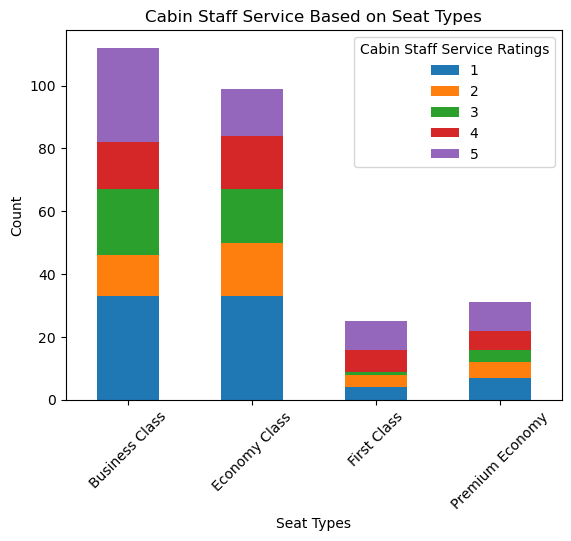

In [47]:
#Plotting stacked bar chart
plt.figure(figsize=(10, 12))
service_seat_count.plot(kind='bar', stacked=True)
plt.xlabel('Seat Types')
plt.ylabel('Count')
plt.title('Cabin Staff Service Based on Seat Types')
plt.xticks(rotation=45)
plt.legend(title='Cabin Staff Service Ratings')
plt.show()

# Aircraft type vs Value for Money (Which is more preferred)

In [48]:
value_count_df = airlines_merged_df.groupby('Aircraft Type')[['Value For Money']].count()
# Rename the columns for clarity
value_count_df.columns = ['Value For Money Count']
top_6_value_count = value_count_df.nlargest(6, 'Value For Money Count')
print(top_6_value_count)

                Value For Money Count
Aircraft Type                        
boeing 777                         42
a320                               39
boeing 747-400                     28
a380                               26
boeing 777-200                     23
boeing 747                         14


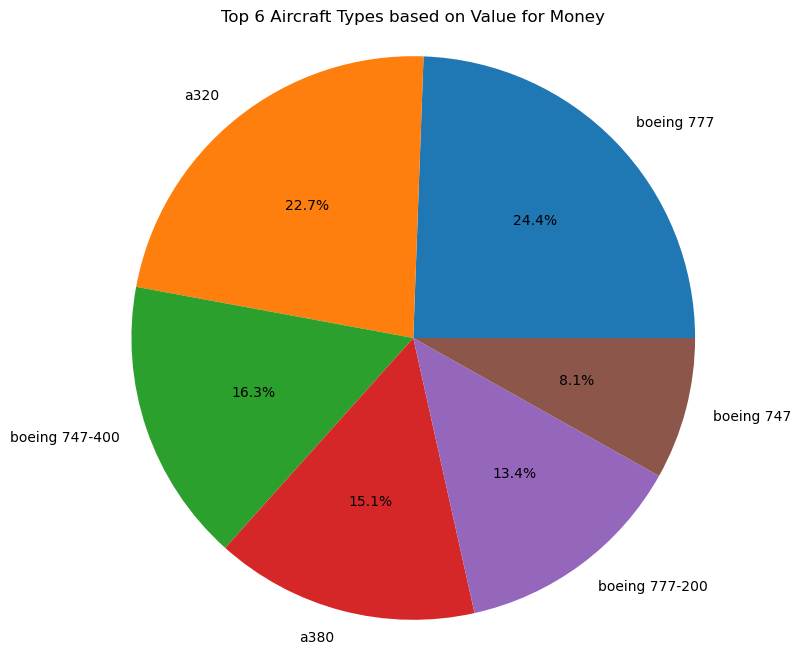

In [56]:
#Plotting a pie chart
airlines_merged_df['Value For Money'] = airlines_merged_df['Value For Money']
aircraft_type_count_df = airlines_merged_df.groupby(['Aircraft Type'])['Value For Money'].count().reset_index(name='Total Count of Value for Money')
sorted_aircraft_type_count_df = aircraft_type_count_df.sort_values(by='Total Count of Value for Money', ascending=False)
top_6_aircraft_type_count_df = sorted_aircraft_type_count_df.head(6)
plt.figure(figsize=(8, 8))
plt.pie(top_6_aircraft_type_count_df['Total Count of Value for Money'], labels=top_6_aircraft_type_count_df['Aircraft Type'], autopct='%1.1f%%')
plt.title('Top 6 Aircraft Types based on Value for Money')
plt.axis('equal')
plt.show()

# Aircraft Recommendation Based On Food & Beverage

In [50]:
aircraft_food_beverage_recommendations = airlines_merged_df.groupby(['Aircraft Type', 'Food & Beverages']).size().unstack(fill_value=0)
aircraft_food_beverage_recommendations = aircraft_food_beverage_recommendations.drop_duplicates()
aircraft_food_beverage_recommendations                                                                                               

Food & Beverages,1,2,3,4,5
Aircraft Type,,,,,
787,0,0,1,0,0
a319,2,0,0,1,0
a319 / boeing 777,0,0,0,0,1
a319 / boeing 789,0,1,0,0,0
a320,30,2,4,3,0
a320 / boeing 777-200,1,0,0,0,0
a320 / boeing 787,0,1,0,1,0
a320neo,1,0,0,0,1
a321,3,3,1,0,0


<Figure size 2000x1600 with 0 Axes>

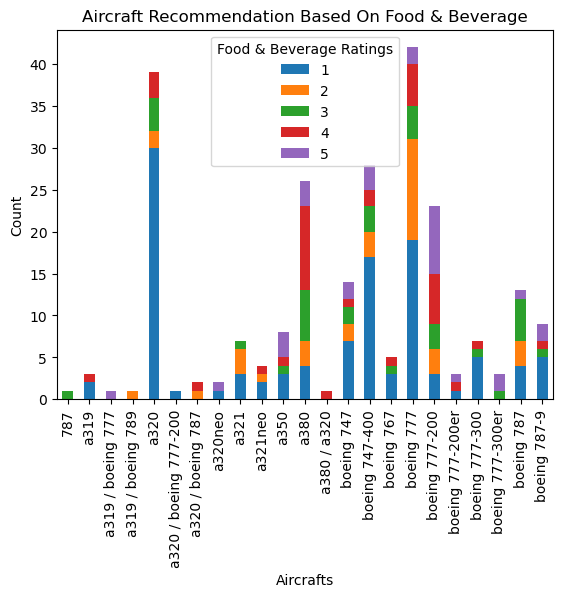

In [51]:
plt.figure(figsize=(20, 16))
aircraft_food_beverage_recommendations.plot(kind='bar', stacked=True)
plt.xlabel('Aircrafts')
plt.ylabel('Count')
plt.title('Aircraft Recommendation Based On Food & Beverage')
plt.xticks(rotation=90)
plt.legend(title='Food & Beverage Ratings', loc='upper center')
plt.show()

# Aircraft Recommendation (which was most recommended)

In [52]:
aircraft_recommendations = airlines_merged_df.groupby(['Aircraft Type', 'Recommended']).size().unstack(fill_value=0)
aircraft_recommendations = aircraft_recommendations.drop_duplicates()
aircraft_recommendations

Recommended,no,yes
Aircraft Type,,
787,1,0
a319,2,1
a319 / boeing 777,0,1
a320,33,6
a320 / boeing 787,1,1
a321,5,2
a321neo,3,1
a350,4,4
a380,11,15


# Seat Types(passenger class) with most Passengers based on Airline type

In [53]:
service_seat_count = airlines_merged_df.groupby(['Aircraft Type', 'Seat_Types']).size().unstack(fill_value=0)
service_seat_count = service_seat_count.drop_duplicates()
service_seat_count

Seat_Types,Business Class,Economy Class,First Class,Premium Economy
Aircraft Type,,,,
787,0,0,0,1
a319,1,2,0,0
a319 / boeing 777,0,1,0,0
a319/320,1,0,0,0
a320,20,19,0,0
a320 / boeing 787,1,1,0,0
a321,3,4,0,0
a321neo,1,3,0,0
a350,4,2,0,2


# Importing new library

In [54]:
import seaborn as sns

# Heat map representing aircraft based on seat type

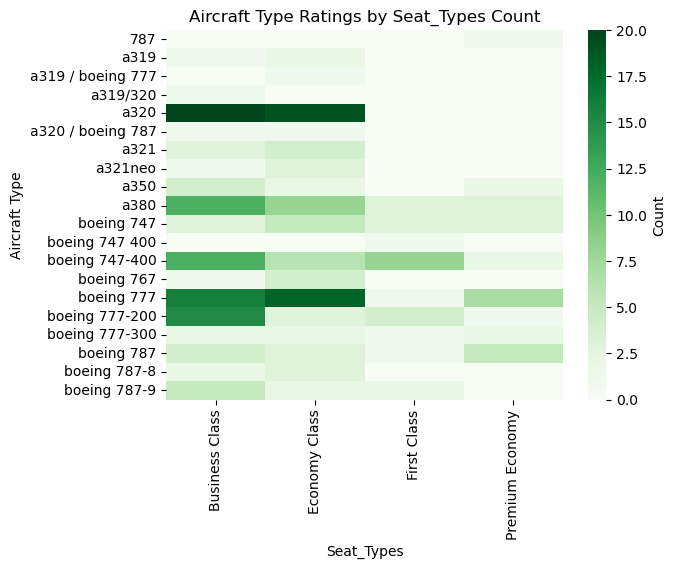

In [55]:
sns.heatmap(service_seat_count, annot=False, cmap="Greens", cbar_kws={'label': 'Count'})
plt.title("Aircraft Type Ratings by Seat_Types Count")
plt.show()